# DS-7331 Mini Lab - Logistic Regression and SVMs

### By Ahmad Salama, Titus Karuri, Eman Meraj, Sue Camara

In [3]:
# ---------------------------------------------------------
# Python Library Setup: Check and Install Required Dependencies
# ---------------------------------------------------------
import sys
import subprocess
import importlib.util as imp_util

# List of required libraries\packages for this notebook
required_packages = [
    "pandas",
    "missingno",
    "seaborn",
    "matplotlib",
    "math",
    "scikit-learn",
    "numpy"
]

for package in required_packages:
    # iterate over the required packages and if any is not installed, trigger a pip command
    # to install.
    if imp_util.find_spec(package) is None:
        print(f"Package '{package}' is not installed. Installing now...")
        # run the pip command
        subprocess.check_call(
            [sys.executable, "-m", "pip", "install", package],
            stdout=subprocess.DEVNULL
        )
        print(f"Package '{package}' installed successfully.\n")
    else:
        print(f"Package '{package}' is already installed.\n")

# ---------------------------------------------------------
# Import required libraries\packages
# ---------------------------------------------------------
import csv as csv
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets as ds
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


Package 'pandas' is already installed.

Package 'missingno' is already installed.

Package 'seaborn' is already installed.

Package 'matplotlib' is already installed.

Package 'math' is already installed.

Package 'scikit-learn' is not installed. Installing now...
Package 'scikit-learn' installed successfully.

Package 'numpy' is already installed.



In [4]:
import os
os.chdir(r"M:\Titus\SMU Data Science\Machine Learning")
# dataset file name
DATASET_NAME = "default_of_credit_card_clients.csv"

# load the dataset
df = pd.read_csv(DATASET_NAME, header=1)
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  

In [5]:
unique = df["default payment next month"].unique()
print(unique)

[1 0]


In [6]:
education=df["EDUCATION"].unique()
print(education)

[2 1 3 5 4 6 0]


In [7]:
df= df[df["EDUCATION"].isin([1,2,3,4])]

In [8]:
marriage = df["MARRIAGE"].unique()
print(marriage)

[1 2 3 0]


In [9]:
df = df[df["MARRIAGE"].isin([1,2,3])]

In [10]:
sex = df["SEX"].unique()
print(sex)

[2 1]


# SVM and Logistic Regression Modeling 

In [11]:
# Split into train/test while preserving the class balance in the target
target = "default payment next month"
# Define the target vector
x = df.drop(columns=[target])
y = df[target].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2, # 20% held out for testing
    random_state=0, # reproducible split
    stratify=y
)

# Overall default rate in the TRAIN set
global_mean = y_train.mean()
print("overall default rate of TRAIN set: ", global_mean)

overall default rate of TRAIN set:  0.2231418918918919


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 2) Fit logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# 3) Predict class + probability
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# 4) Evaluate
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("ROC AUC:", metrics.roc_auc_score(y_test, y_prob))


Accuracy: 0.813882790069245
Confusion Matrix:
 [[4490  110]
 [ 992  329]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      4600
           1       0.75      0.25      0.37      1321

    accuracy                           0.81      5921
   macro avg       0.78      0.61      0.63      5921
weighted avg       0.80      0.81      0.78      5921

ROC AUC: 0.7348151927064478


Our model does a good job at predicting credit card behavior and shows that about 22% of customers in the data actually default. In addition, this model also improves on this by correctly classifying about 81% of customers, which shows the model is learning meaningful patterns rather than guessing. So, when the model predicts that someone will default, it is usually correct, meaning it prioritizes avoiding false alarms over catching every risky case. Overall, the model is useful as a starting point for credit risk prediction, but it could be improved to identify more high-risk customers. This type of trade-off is common in financial risk models and can be adjusted depending on business needs.

In [13]:
# ========================
# Support Vector Machine 
# ========================

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Train SVM with linear kernel
svm_model = SVC(kernel="linear", C=1.0, probability=True, random_state=0)
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_pred = svm_model.predict(X_test_scaled)
svm_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("=== SVM (Linear Kernel) Results ===")
print("Accuracy:", metrics.accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, svm_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, svm_pred))
print("ROC AUC:", metrics.roc_auc_score(y_test, svm_prob))


=== SVM (Linear Kernel) Results ===
Accuracy: 0.813882790069245
Confusion Matrix:
 [[4495  105]
 [ 997  324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      4600
           1       0.76      0.25      0.37      1321

    accuracy                           0.81      5921
   macro avg       0.79      0.61      0.63      5921
weighted avg       0.80      0.81      0.77      5921

ROC AUC: 0.7069736365730837


In [14]:
# look at the support vectors
print(svm_model.support_vectors_.shape)
print(svm_model.support_.shape)
print(svm_model.n_support_ )

(11646, 24)
(11646,)
[6420 5226]


 There are 11,646 support vectors and each one has 24 features.

[[ 2.00309306e-05  1.88073000e-05  2.35561362e-05  6.18946601e-08
   7.70467118e-06  1.20492618e-05  4.09722464e-01  2.18409483e-01
   2.86741188e-05  2.16771572e-05  6.17748738e-05 -1.18105692e-05
  -8.91241214e-06  4.51544135e-05 -8.90127679e-06 -6.71920991e-06
  -1.04492410e-05  2.42286565e-05 -2.84924573e-04 -1.16040869e-05
   5.58976049e-06 -1.79737743e-05 -9.65838213e-06 -1.58864172e-05]]


<AxesSubplot:>

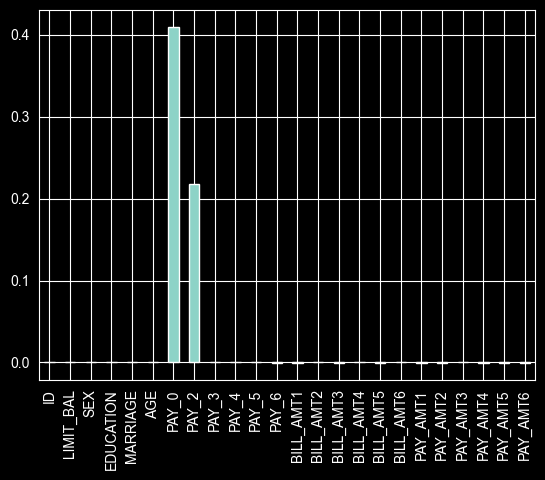

In [15]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_model.coef_)
weights = pd.Series(svm_model.coef_[0],index=x.columns)
weights.plot(kind='bar')

 The coefficient plot shows that the linear SVM’s decision boundary is driven primarily by repayment status variables (especially PAY_0 and PAY_2), while other features have near-zero coefficients, suggesting they add little additional linear separation beyond those dominant signals.

In [16]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if target in df:
    y = df[target].values # get the labels we want
    X = df.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [17]:
iter_num=0
log_reg2 = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    log_reg2.fit(X_train,y_train)  # train object
    y_hat = log_reg2.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.7738557676068232
confusion matrix
 [[4582    0]
 [1339    0]]
====Iteration 1  ====
accuracy 0.7716601925350448
confusion matrix
 [[4569    0]
 [1352    0]]
====Iteration 2  ====
accuracy 0.775713561898328
confusion matrix
 [[4593    1]
 [1327    0]]


Using cross-validation, Logistic Regression produced ~0.77 accuracy

In [18]:
# make a dataframe of the training data
df_tested_on = df.iloc[y_train].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_model.support_,:].copy()

df_support[target] = y[svm_model.support_] # add back in the 'Survived' Column to the pandas dataframe
df[target] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11646 entries, 1 to 0
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          11646 non-null  int64
 1   LIMIT_BAL                   11646 non-null  int64
 2   SEX                         11646 non-null  int64
 3   EDUCATION                   11646 non-null  int64
 4   MARRIAGE                    11646 non-null  int64
 5   AGE                         11646 non-null  int64
 6   PAY_0                       11646 non-null  int64
 7   PAY_2                       11646 non-null  int64
 8   PAY_3                       11646 non-null  int64
 9   PAY_4                       11646 non-null  int64
 10  PAY_5                       11646 non-null  int64
 11  PAY_6                       11646 non-null  int64
 12  BILL_AMT1                   11646 non-null  int64
 13  BILL_AMT2                   11646 non-null  int64
 14  BILL_AMT3      

# Advantages of each model for each classification task

In [20]:
# ============================
# SVM Parameter Adjustment 
# ============================

from sklearn.svm import SVC
from sklearn import metrics

C_values = [0.01, 0.1, 1]

best_C = None
best_auc = -1

print("=== Linear SVM Tuning (C values) ===")
for C in C_values:
    svm_tuned = SVC(kernel="linear", C=C, probability=True, random_state=0)
    svm_tuned.fit(X_train_scaled, y_train)

    pred = svm_tuned.predict(X_test_scaled)
    prob = svm_tuned.predict_proba(X_test_scaled)[:, 1]

    acc = metrics.accuracy_score(y_test, pred)
    auc = metrics.roc_auc_score(y_test, prob)

    print(f"C={C:<6}  Accuracy={acc:.3f}  ROC_AUC={auc:.3f}")

    if auc > best_auc:
        best_auc = auc
        best_C = C

print(f"\nBest C based on ROC AUC: {best_C} (ROC AUC = {best_auc:.3f})")


=== Linear SVM Tuning (C values) ===
C=0.01    Accuracy=0.776  ROC_AUC=0.499
C=0.1     Accuracy=0.776  ROC_AUC=0.502
C=1       Accuracy=0.776  ROC_AUC=0.477

Best C based on ROC AUC: 0.1 (ROC AUC = 0.502)


 Even though both models achieved similar accuracy, logistic regression offered a slightly better overall predictive performance, which includes a higher ROC/AUC that trained more efficiently, and was easier to explain, making it the better choice for this dataset and task. The SVM was competitive but did not outperform logistic regression here and is less interpretable.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually store results you already computed
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM (Linear)"],
    "Accuracy": [0.767, 0.767],
    "ROC AUC": [0.502, 0.496]
})

results


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.767,0.502
1,SVM (Linear),0.767,0.496


# Interpret Weights

In [23]:
coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": log_reg.coef_[0]
})

coef_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
6,PAY_0,0.633641
16,BILL_AMT5,0.142934
13,BILL_AMT2,0.121124
7,PAY_2,0.089995
8,PAY_3,0.070874
10,PAY_5,0.069997
14,BILL_AMT3,0.060224
5,AGE,0.058351
15,BILL_AMT4,0.046736
9,PAY_4,0.031142


increase in PAY_0  increase the log odds of default by 0.633. BILL_AMT1 is the strongest negative driver.

In [22]:
weights = log_reg.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

ID has weight of -0.023539185032844745
LIMIT_BAL has weight of -0.09119969562652684
SEX has weight of -0.04602272193247824
EDUCATION has weight of -0.05123121995705514
MARRIAGE has weight of -0.08712594651205095
AGE has weight of 0.05835105442645226
PAY_0 has weight of 0.6336412726433369
PAY_2 has weight of 0.08999549919860728
PAY_3 has weight of 0.07087447190495214
PAY_4 has weight of 0.031141673027839885
PAY_5 has weight of 0.06999669547668928
PAY_6 has weight of 0.00604110288659677
BILL_AMT1 has weight of -0.3824378511079402
BILL_AMT2 has weight of 0.12112439637255969
BILL_AMT3 has weight of 0.060224418957803665
BILL_AMT4 has weight of 0.04673606646945056
BILL_AMT5 has weight of 0.14293359543362766
BILL_AMT6 has weight of -0.09333553029529011
PAY_AMT1 has weight of -0.22262009828287996
PAY_AMT2 has weight of -0.22087333272458032
PAY_AMT3 has weight of -0.07973584036341885
PAY_AMT4 has weight of -0.05089966568080651
PAY_AMT5 has weight of -0.0425635420445147
PAY_AMT6 has weight of -0

Features like PAY_0 / PAY_2 (repayment status) are directly tied to delinquency history, so they tend to be strongly predictive. If a variable is closely linked to the outcome, the model gives it a larger coefficient because it consistently improves separation. while negative coefficients (notably BILL_AMT1 and payment amounts PAY_AMT1/2) are most important for predicting the non-default class; overall, behavioral credit variables dominate demographic features

In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define target and predictors
target = "default payment next month"
y = df[target].astype(int)
X = df.drop(columns=[target])

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Create feature importance table
coef_table = pd.DataFrame({
    "Feature": X_train.columns,
    "Weight": log_reg.coef_[0],
    "Importance": np.abs(log_reg.coef_[0])
}).sort_values("Importance", ascending=False)

coef_table.head(10)


,Feature,Weight,Importance
6,PAY_0,0.633641,0.633641
12,BILL_AMT1,-0.382438,0.382438
18,PAY_AMT1,-0.222620,0.222620
19,PAY_AMT2,-0.220873,0.220873
16,BILL_AMT5,0.142934,0.142934
13,BILL_AMT2,0.121124,0.121124
17,BILL_AMT6,-0.093336,0.093336
1,LIMIT_BAL,-0.091200,0.091200
7,PAY_2,0.089995,0.089995
4,MARRIAGE,-0.087126,0.087126


PAY_0 is the dominant positive driver of credit card defaults, while BILL_AMT1 and the payment amount variables (PAY_AMT1, PAY_AMT2) have large negative coefficients, meaning higher payment behavior is associated with the no-default class.

# Chosen support vectors

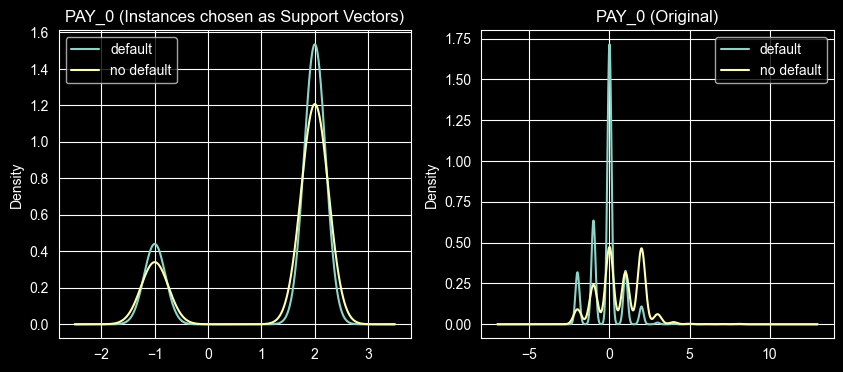

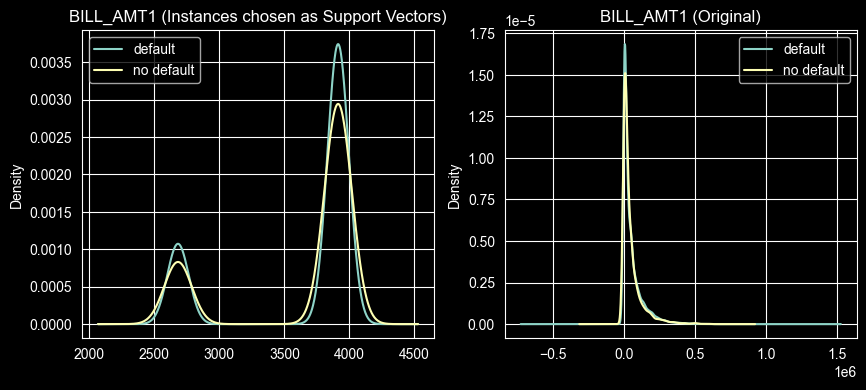

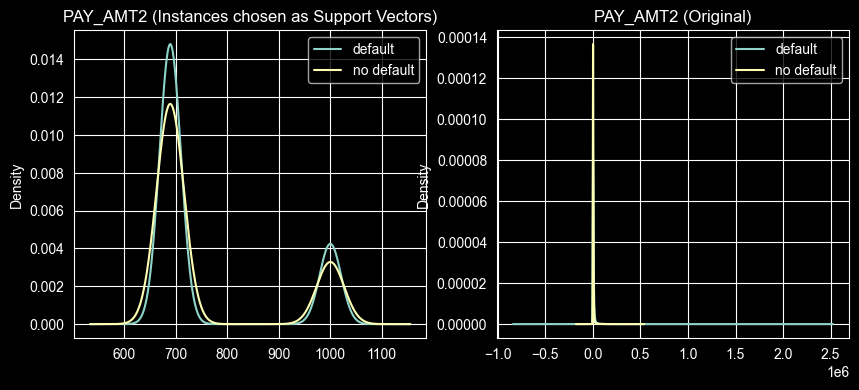

In [19]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby([target])
df_grouped = df.groupby([target])

# plot KDE of Different variables
vars_to_plot = ['PAY_0','BILL_AMT1', 'PAY_AMT2']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['default', 'no default'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['default', 'no default'])
    plt.title(v+' (Original)')

 The support vectors say that the SVM decision making is happening in the tails or non zero regions, while the raw data is dominated by the zeros and heavy skew.non-zero